# USA Unemployment data

Lets create an interactive image to visualize the unemployment data by months and year.

The simplest way would be a table :), but sure more that there more interesting way to visualize it!
Let's think how can we create it!


In [1]:
import numpy as np
from bokeh.sampledata.unemployment1948 import data

# Read in the data with pandas. Convert the year column to string
data['Year'] = [str(x) for x in data['Year']]
years = list(data['Year'])
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
data = data.set_index('Year')

data.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual
Year,,,,,,,,,,,,,
1948,4.0,4.7,4.5,4.0,3.4,3.9,3.9,3.6,3.4,2.9,3.3,3.6,3.8
1949,5.0,5.8,5.6,5.4,5.7,6.4,7.0,6.3,5.9,6.1,5.7,6.0,5.9
1950,7.6,7.9,7.1,6.0,5.3,5.6,5.3,4.1,4.0,3.3,3.8,3.9,5.3
1951,4.4,4.2,3.8,3.2,2.9,3.4,3.3,2.9,3.0,2.8,3.2,2.9,3.3
1952,3.7,3.8,3.3,3.0,2.9,3.2,3.3,3.1,2.7,2.4,2.5,2.5,3.0


In [2]:
np.int16(years)

array([1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016], dtype=int16)

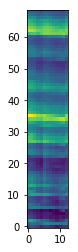

In [3]:
# With matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(data, origin='lower',)
plt.show()

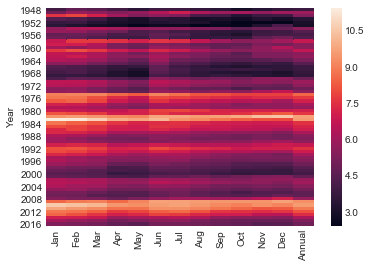

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_style("whitegrid")
sns.set_context(rc={"figure.figsize": (8, 4)})
sns.heatmap(data);

In [5]:
#Can you improve it?

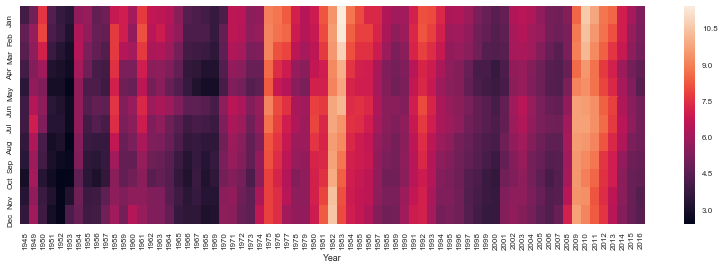

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_style("whitegrid")
sns.set(font_scale=0.8) 

cmap = sns.color_palette("Paired")
plt.figure(figsize=(14, 4))
sns.heatmap(data[months].T);

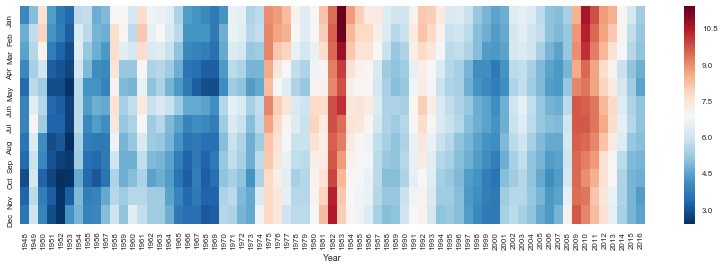

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_style("whitegrid")
sns.set(font_scale=0.8) 

cmap = sns.color_palette("Paired")
plt.figure(figsize=(14, 4))
sns.heatmap(data[months].T,cmap= 'RdBu_r');

In [2]:
from collections import OrderedDict

import numpy as np

from bokeh.plotting import ColumnDataSource, figure, show, output_file
from bokeh.models import HoverTool
from bokeh.sampledata.unemployment1948 import data

# Read in the data with pandas. Convert the year column to string
data['Year'] = [str(x) for x in data['Year']]
years = list(data['Year'])
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
data = data.set_index('Year')

# this is the colormap from the original plot
colors = [
    "#75968f", "#a5bab7", "#c9d9d3", "#e2e2e2", "#dfccce",
    "#ddb7b1", "#cc7878", "#933b41", "#550b1d"
]

# Set up the data for plotting. We will need to have values for every
# pair of year/month names. Map the rate to a color.
month = []
year = []
color = []
rate = []
for y in years:
    for m in months:
        month.append(m)
        year.append(y)
        monthly_rate = data[m][y]
        rate.append(monthly_rate)
        color.append(colors[min(int(monthly_rate)-2, 8)])

source = ColumnDataSource(
    data=dict(month=month, year=year, color=color, rate=rate)
)

output_file('unemployment.html')

TOOLS = "hover,save,pan,box_zoom,wheel_zoom"
TOOLS = "hover"

p = figure(title="US Unemployment (1948 - 2013)",
    x_range=years, y_range=list(reversed(months)),
    x_axis_location="above", plot_width=900, plot_height=400,
    toolbar_location="left", tools=TOOLS)

p.rect("year", "month", 1, 1, source=source,
    color="color", line_color=None)

p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_text_font_size = "5pt"
p.axis.major_label_standoff = 0
p.xaxis.major_label_orientation = np.pi/3

hover = p.select(dict(type=HoverTool))
hover.tooltips = OrderedDict([
    ('date', '@month @year'),
    ('rate', '@rate'),
])

show(p)      # show the plot

##  Let's see another example: Weather dataset

In [24]:
from bokeh.io import show
from bokeh.models import (
    ColumnDataSource,
    HoverTool,
    LogColorMapper
)
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties

from bokeh.sampledata.unemployment import data as unemployment
''' This modules exposes per-county unemployment data for Unites States in
2009. It exposes a dictionary ``data`` which is indexed by the two-tuple
containing ``(state_id, county_id)`` and has the unemployment rate (2009) as
the associated value.
'''


output_file('unemployment_countries.html')


palette.reverse()

counties = {
    code: county for code, county in counties.items() if county["state"] == "ca"
}

county_xs = [county["lons"] for county in counties.values()]
county_ys = [county["lats"] for county in counties.values()]

county_names = [county['name'] for county in counties.values()]
county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LogColorMapper(palette=palette)

source = ColumnDataSource(data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=county_rates,
))

TOOLS = "hover"
#TOOLS = "pan,wheel_zoom,box_zoom,reset,hover,save"
p = figure(
    title="California Unemployment, 2009", tools=TOOLS,
    x_axis_location=None, y_axis_location=None
)
p.grid.grid_line_color = None

p.patches('x', 'y', source=source,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

hover = p.select_one(HoverTool)
hover.point_policy = "follow_mouse"
hover.tooltips = [
    ("Name", "@name"),
    ("Unemployment rate)", "@rate%"),
    ("(Long, Lat)", "($x, $y)"),
]

show(p)

Nice DEMO
https://demo.bokeh.org/weather